<a href="https://colab.research.google.com/github/bhosalevivek04/LP3/blob/main/LP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Practical 1: Write a program non-recursive and recursive program to calculate Fibonacci numbers and analyze their time and space complexity.
def fibonacci(n):
    step_count = 0
    if n == 0:
        return 0, step_count
    elif n == 1:
        return 1, step_count

    a, b = 0, 1
    step_count += 2  # for initial assignments a and b

    for i in range(2, n + 1):
        a, b = b, a + b
        step_count += 1  # for each iteration
        step_count += 2  # for the assignments inside the loop

    return b, step_count

# Example usage:
n = int(input("Enter the Fibonacci term you want to find: "))
fib_number, steps = fibonacci(n)
print(f"Fibonacci number at position {n} is {fib_number}")
print(f"Total steps taken: {steps}")

Enter the Fibonacci term you want to find: 10
Fibonacci number at position 10 is 55
Total steps taken: 29


In [7]:
# Practical 2: Write a program to implement Huffman Encoding using a greedy strategy.
class Job:
    def __init__(self, job_id, deadline, profit):
        self.job_id = job_id
        self.deadline = deadline
        self.profit = profit

def job_sequencing_with_deadlines(jobs):
    # Sort jobs based on decreasing order of profit
    jobs.sort(key=lambda x: x.profit, reverse=True)

    # Find the maximum deadline to create a time slot array
    max_deadline = max(job.deadline for job in jobs)
    time_slots = [-1] * (max_deadline + 1)  # Array to track free time slots

    total_profit = 0
    job_sequence = []

    # Iterate over the sorted jobs
    for job in jobs:
        # Find a free time slot for this job, starting from the latest slot before its deadline
        for t in range(min(job.deadline, max_deadline), 0, -1):
            if time_slots[t] == -1:  # If the time slot is free
                time_slots[t] = job.job_id  # Assign the job to this time slot
                total_profit += job.profit  # Add profit to the total
                job_sequence.append(job.job_id)  # Add job to the sequence
                break  # Move to the next job after assigning

    return job_sequence, total_profit

# Example usage:
jobs = [
    Job('Job1', 2, 100),
    Job('Job2', 1, 19),
    Job('Job3', 2, 27),
    Job('Job4', 1, 25),
    Job('Job5', 3, 15)
]

job_sequence, total_profit = job_sequencing_with_deadlines(jobs)
print(f"Job sequence: {job_sequence}")
print(f"Total profit: {total_profit}")

Job sequence: ['Job1', 'Job3', 'Job5']
Total profit: 142


In [8]:
# Practical 3: Write a program to solve a fractional Knapsack problem using a greedy method.
class Item:
    def __init__(self, value, weight):
        self.value = value
        self.weight = weight

def fractional_knapsack(capacity, items):
    # Sort items by value-to-weight ratio in decreasing order
    items.sort(key=lambda x: x.value / x.weight, reverse=True)

    total_value = 0  # Total value in the knapsack

    for item in items:
        if capacity - item.weight >= 0:
            # If the whole item can be added
            capacity -= item.weight
            total_value += item.value
        else:
            # If only part of the item can be added
            total_value += item.value * (capacity / item.weight)
            break  # Knapsack is full

    return total_value

# Example usage
if __name__ == "__main__":
    items = [Item(60, 10), Item(100, 20), Item(120, 30)]  # Example items
    capacity = 50  # Knapsack capacity
    max_value = fractional_knapsack(capacity, items)
    print(f"Maximum value in the knapsack: {max_value:.2f}")

Maximum value in the knapsack: 240.00


In [9]:
# Practical 4: Write a program to solve a 0-1 Knapsack problem using dynamic programming or branch and bound strategy.

# Code: 0-1 Knapsack using Dynamic Programming
def knapsack_dp(weights, values, capacity):
    n = len(weights)
    # Create a 2D array to store the maximum value for each capacity and item count
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    # Build the dp array
    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]

    # The value in the last cell will be the maximum value for the knapsack
    return dp[n][capacity]

# Example usage
values = [60, 100, 120]   # Value of each item
weights = [10, 20, 30]    # Weight of each item
capacity = 50             # Capacity of knapsack

max_value = knapsack_dp(weights, values, capacity)
print(f"Maximum value in the knapsack: {max_value}")

Maximum value in the knapsack: 220


In [10]:
# Code: 0-1 Knapsack using Branch and Bound
class Item:
    def __init__(self, value, weight):
        self.value = value
        self.weight = weight
        self.ratio = value / weight

class Node:
    def __init__(self, level, profit, weight, bound):
        self.level = level
        self.profit = profit
        self.weight = weight
        self.bound = bound

def bound(node, n, capacity, items):
    if node.weight >= capacity:
        return 0
    profit_bound = node.profit
    j = node.level + 1
    total_weight = node.weight

    while j < n and total_weight + items[j].weight <= capacity:
        total_weight += items[j].weight
        profit_bound += items[j].value
        j += 1

    if j < n:
        profit_bound += (capacity - total_weight) * items[j].ratio

    return profit_bound

def knapsack_branch_and_bound(capacity, items, n):
    items.sort(key=lambda x: x.ratio, reverse=True)
    queue = []
    u = Node(-1, 0, 0, 0)
    u.bound = bound(u, n, capacity, items)
    max_profit = 0
    queue.append(u)

    while queue:
        u = queue.pop(0)
        if u.level == -1:
            v = Node(0, 0, 0, 0)
        if u.level == n - 1:
            continue

        v = Node(u.level + 1, u.profit + items[v.level].value, u.weight + items[v.level].weight, 0)

        if v.weight <= capacity and v.profit > max_profit:
            max_profit = v.profit

        v.bound = bound(v, n, capacity, items)
        if v.bound > max_profit:
            queue.append(v)

        v = Node(u.level + 1, u.profit, u.weight, 0)
        v.bound = bound(v, n, capacity, items)
        if v.bound > max_profit:
            queue.append(v)

    return max_profit

# Example usage
values = [60, 100, 120]
weights = [10, 20, 30]
capacity = 50
items = [Item(values[i], weights[i]) for i in range(len(values))]
n = len(items)

max_profit = knapsack_branch_and_bound(capacity, items, n)
print(f"Maximum profit in the knapsack: {max_profit}")

Maximum profit in the knapsack: 220


In [11]:
# 5. Mini Project
import time
import random
from threading import Thread

# Merge Sort Implementation
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

# Multithreaded Merge Sort Implementation
def threaded_merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        left_thread = Thread(target=merge_sort, args=(L,))
        right_thread = Thread(target=merge_sort, args=(R,))

        # Start the threads
        left_thread.start()
        right_thread.start()

        # Wait for both threads to finish
        left_thread.join()
        right_thread.join()

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

# Function to measure time taken by sorting algorithms
def measure_time(sort_function, arr):
    start_time = time.time()
    sort_function(arr)
    end_time = time.time()
    return end_time - start_time

# Main function to compare both algorithms
def compare_merge_sort_algorithms():
    arr_size = 10000  # Adjust the size for testing
    best_case = list(range(arr_size))  # Sorted array (best case for merge sort)
    worst_case = list(range(arr_size, 0, -1))  # Reversed array (worst case for merge sort)

    # Measure time for single-threaded merge sort
    print("Testing Single-threaded Merge Sort:")
    best_time_single = measure_time(merge_sort, best_case.copy())
    worst_time_single = measure_time(merge_sort, worst_case.copy())
    print(f"Best case time (Single-threaded): {best_time_single:.6f} seconds")
    print(f"Worst case time (Single-threaded): {worst_time_single:.6f} seconds")

    # Measure time for multithreaded merge sort
    print("\nTesting Multithreaded Merge Sort:")
    best_time_multi = measure_time(threaded_merge_sort, best_case.copy())
    worst_time_multi = measure_time(threaded_merge_sort, worst_case.copy())
    print(f"Best case time (Multithreaded): {best_time_multi:.6f} seconds")
    print(f"Worst case time (Multithreaded): {worst_time_multi:.6f} seconds")

# Run the comparison
if __name__ == "__main__":
    compare_merge_sort_algorithms()

Testing Single-threaded Merge Sort:
Best case time (Single-threaded): 0.037866 seconds
Worst case time (Single-threaded): 0.035687 seconds

Testing Multithreaded Merge Sort:
Best case time (Multithreaded): 0.053634 seconds
Worst case time (Multithreaded): 0.065706 seconds


In [ ]:
#BELOW THIS ML PRACTICALS

In [13]:
# Practical 6 : Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.

# 1. Pre-process the Dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/uber.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Explore the data
print(df.head())
print(df.info())

# Convert 'pickup_datetime' to datetime type
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

# Extract features from the datetime column
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df['minute'] = df['pickup_datetime'].dt.minute

# Drop columns that are not needed
df = df.drop(['pickup_datetime', 'pickup_latitude', 'pickup_longitude',
              'dropoff_latitude', 'dropoff_longitude', 'key'], axis=1)

# Handle missing values
df = df.dropna()

# Encode categorical variables (if any) like 'pickup_datetime', etc.
df = pd.get_dummies(df, drop_first=True)

# Final check of data
print(df.head())

   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

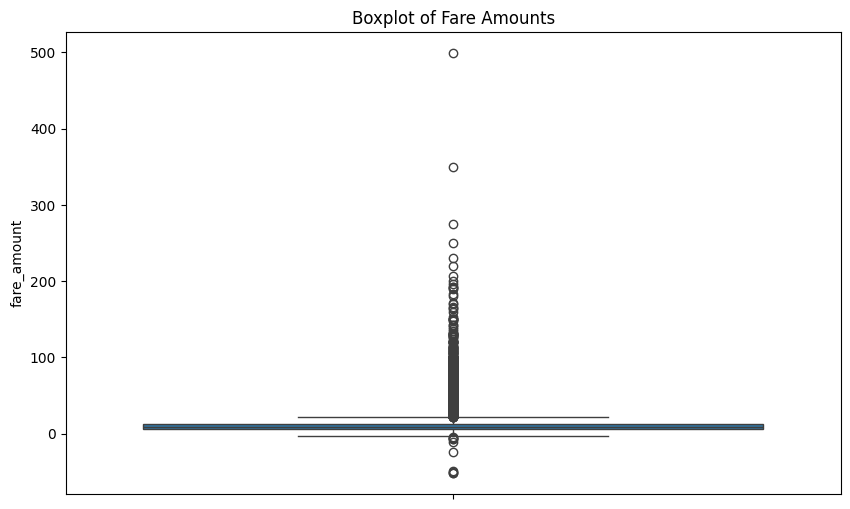

In [14]:
# 2. Identify Outliers

# Visualize outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(df['fare_amount'])
plt.title("Boxplot of Fare Amounts")
plt.show()

# Remove outliers based on fare_amount
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]  # Keep fare within a reasonable range

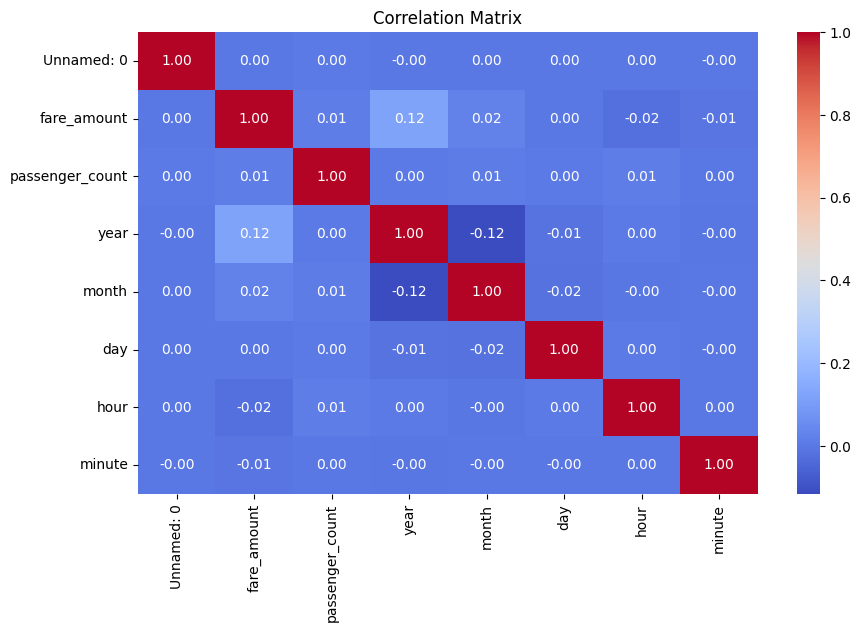

In [15]:
# 3. Check the Correlation

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [16]:
# 4. Implement Linear Regression and Random Forest Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate Linear Regression
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression R2: {lr_r2:.4f}")
print(f"Linear Regression RMSE: {lr_rmse:.4f}")

Linear Regression R2: 0.0164
Linear Regression RMSE: 9.2740


In [18]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest R2: {rf_r2:.4f}")
print(f"Random Forest RMSE: {rf_rmse:.4f}")

Random Forest R2: -0.0506
Random Forest RMSE: 9.5844


In [19]:
# 5. Evaluate the Models and Compare Scores
print("Model Performance Comparison:")
print(f"Linear Regression: R2 = {lr_r2:.4f}, RMSE = {lr_rmse:.4f}")
print(f"Random Forest Regression: R2 = {rf_r2:.4f}, RMSE = {rf_rmse:.4f}")

Model Performance Comparison:
Linear Regression: R2 = 0.0164, RMSE = 9.2740
Random Forest Regression: R2 = -0.0506, RMSE = 9.5844


In [21]:
# Practical 7 : Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.
import pandas as pd

# Load the dataset (update the file path to where you've saved the CSV)
file_path = '/content/Churn_Modelling.csv'
df = pd.read_csv(file_path)

# View the dataset
print(df.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [22]:
from sklearn.model_selection import train_test_split

# Drop unnecessary columns like 'RowNumber', 'CustomerId', 'Surname'
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Convert categorical variables into dummy variables
df = pd.get_dummies(df, drop_first=True)

# Define X (features) and y (target)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (8000, 11)
Test set size: (2000, 11)


In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data normalized.")


Data normalized.


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the Neural Network
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))

# Add second hidden layer
model.add(Dense(units=16, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7778 - loss: 0.5234 - val_accuracy: 0.8095 - val_loss: 0.4397
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8127 - loss: 0.4363 - val_accuracy: 0.8260 - val_loss: 0.4085
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8237 - loss: 0.4228 - val_accuracy: 0.8375 - val_loss: 0.3924
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8302 - loss: 0.4047 - val_accuracy: 0.8435 - val_loss: 0.3752
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8475 - loss: 0.3760 - val_accuracy: 0.8570 - val_loss: 0.3628
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8514 - loss: 0.3695 - val_accuracy: 0.8590 - val_loss: 0.3536
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8600 - loss: 0.3468 - val_accuracy: 0.8570 - val_loss: 0.3464
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8580 - loss: 0.3424 - val_accuracy: 0.8605 - val_

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8635
Confusion Matrix:
[[1550   57]
 [ 216  177]]


In [32]:
# Practical 8 : Implement K-Nearest Neighbors algorithm on diabetes.csv dataset.

import pandas as pd

# Load the dataset (update the path to your file location)
file_path = '/content/diabetes.csv'
df = pd.read_csv(file_path)

# View the dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  


In [33]:
# Check for missing values
print(df.isnull().sum())

# Separating features (X) and target (y)
X = df.drop('Outcome', axis=1)  # 'Outcome' is the target variable
y = df['Outcome']

# Normalize the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64


In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can try different values of k

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Error Rate (1 - Accuracy)
error_rate = 1 - accuracy
print(f"Error Rate: {error_rate:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")


Confusion Matrix:
[[79 20]
 [28 27]]
Accuracy: 0.6883
Error Rate: 0.3117
Precision: 0.5745
Recall: 0.4909


In [39]:
# Practical 9 : Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset.

import pandas as pd

# Load the dataset with a different encoding
file_path = '/content/sales_data_sample.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Use 'ISO-8859-1' encoding

# View the dataset
print(df.head())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [40]:
# Select relevant columns for clustering
df = df[['SALES', 'QUANTITYORDERED', 'PRICEEACH']]

# Check for missing values
print(df.isnull().sum())

# Drop any rows with missing values
df = df.dropna()

# Normalize the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# View the normalized data
print(pd.DataFrame(df_scaled, columns=df.columns).head())


SALES              0
QUANTITYORDERED    0
PRICEEACH          0
dtype: int64
      SALES  QUANTITYORDERED  PRICEEACH
0 -0.370825        -0.522891   0.596978
1 -0.427897        -0.112201  -0.114450
2  0.179443         0.606505   0.549384
3  0.104701         1.017195  -0.019759
4  0.896740         1.427884   0.810158


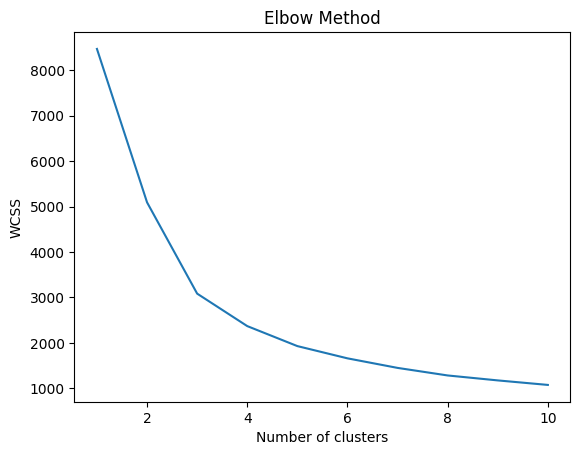

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [42]:
# Let's assume the optimal number of clusters is 3 (based on the Elbow method)
optimal_clusters = 3

# K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(df_scaled)

# Add the cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# View the dataset with clusters
print(df.head())


     SALES  QUANTITYORDERED  PRICEEACH  Cluster
0  2871.00               30      95.70        2
1  2765.90               34      81.35        2
2  3884.34               41      94.74        1
3  3746.70               45      83.26        1
4  5205.27               49     100.00        1


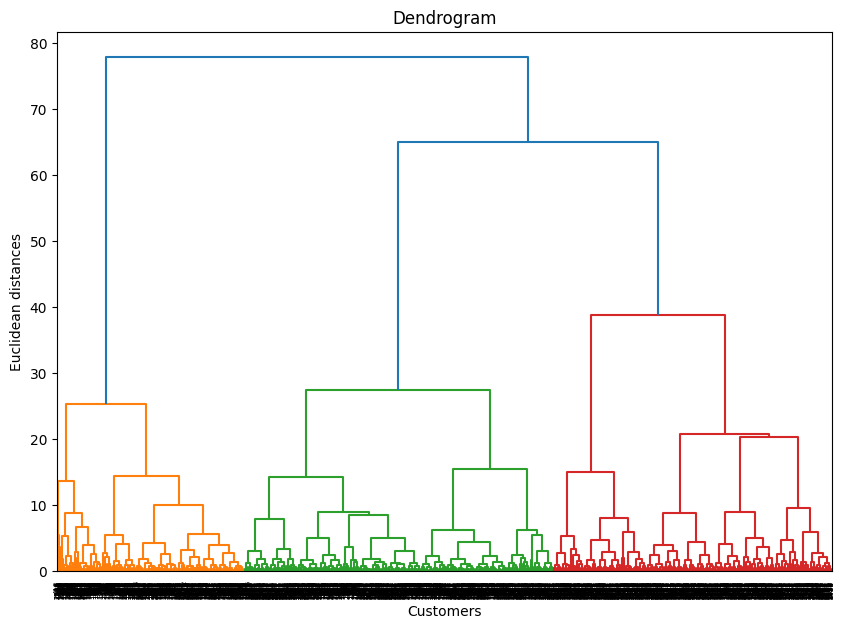

     SALES  QUANTITYORDERED  PRICEEACH  Cluster  HC_Cluster
0  2871.00               30      95.70        2           2
1  2765.90               34      81.35        2           2
2  3884.34               41      94.74        1           1
3  3746.70               45      83.26        1           0
4  5205.27               49     100.00        1           1


In [44]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Visualize the Dendrogram to find the optimal number of clusters
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Perform Hierarchical Clustering
optimal_clusters = 3  # Use the number of clusters based on the dendrogram
hc = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_scaled)

# Add the hierarchical cluster labels to the original dataset
df['HC_Cluster'] = y_hc

# View the dataset with Hierarchical Clustering labels
print(df.head())


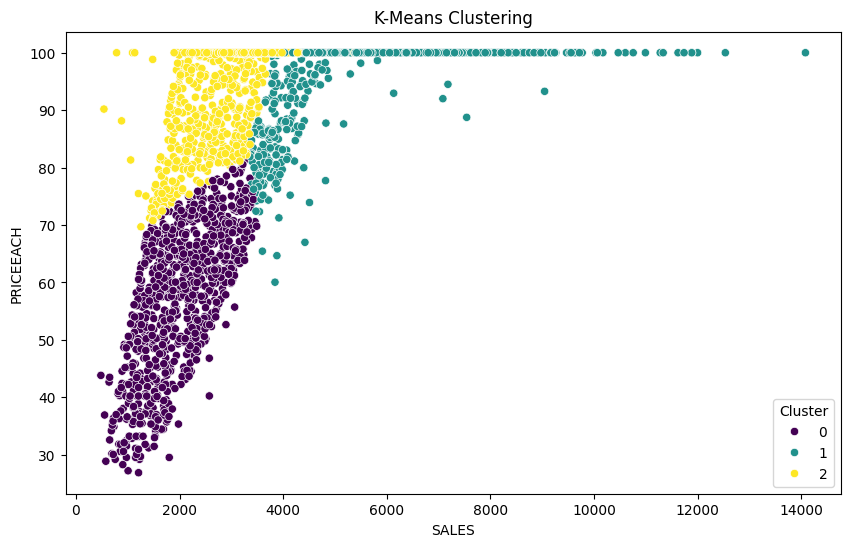

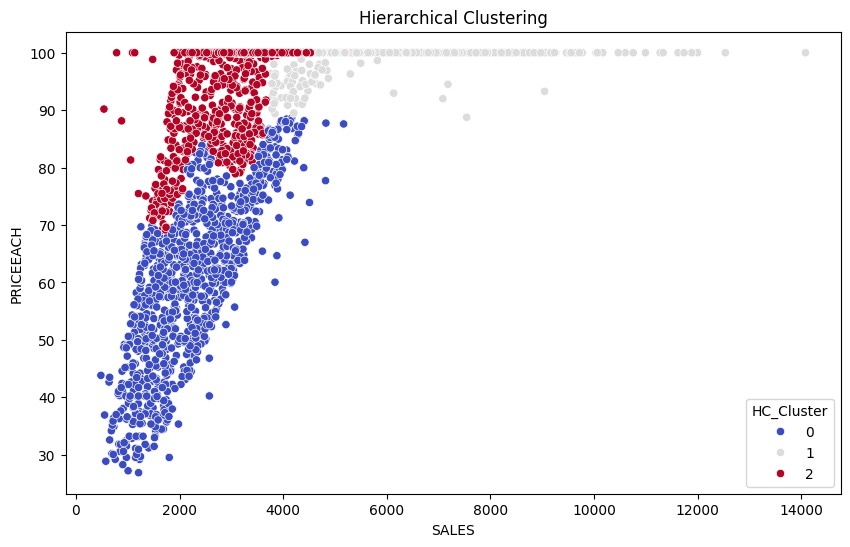

In [46]:
import seaborn as sns

# Plot K-Means Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['SALES'], y=df['PRICEEACH'], hue=df['Cluster'], palette='viridis')
plt.title("K-Means Clustering")
plt.show()

# Plot Hierarchical Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['SALES'], y=df['PRICEEACH'], hue=df['HC_Cluster'], palette='coolwarm')
plt.title("Hierarchical Clustering")
plt.show()


In [47]:
# 10. Mini Project

import pandas as pd

# URL of the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

# Load the dataset from the URL
data = pd.read_csv(url)

# View the first few rows of the dataset
print(data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [48]:
# Display basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Get basic statistics about the dataset
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [49]:
# Fill missing values in 'Age' with the mean and 'Embarked' with the most frequent value
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to too many missing values, and also drop 'PassengerId', 'Name', 'Ticket' as they are not useful for prediction
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


<ipython-input-49-2d272b29ae43>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
<ipython-input-49-2d272b29ae43>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [50]:
# Convert 'Sex' and 'Embarked' columns to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# View the updated dataset
print(data.head())


   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [51]:
# The target variable is 'Survived', and the rest are features
X = data.drop('Survived', axis=1)
y = data['Survived']


In [52]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (712, 8)
Test data shape: (179, 8)


In [53]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8045
Confusion Matrix:
[[90 15]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

